In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bemcs
import solve_bem

In [8]:
# Elastic parameters
mu = 1
nu = 0.25
# fault and topographic parameters
nfault = 20
fault_x = 100
dip = 10
height = 4

# construct fault with topography
els, labels, bctype, bc_x, bc_y = solve_bem.construct_topographymesh(
    height, dip, fault_x, nfault
)

# construct fault with flat topography
els_flat, _, _, _, _ = solve_bem.construct_topographymesh(0, dip, fault_x, nfault)

# Solve system

In [9]:
# for case with topography
_, qcoefs_s, qcoefs_n = solve_bem.setup_and_solve_bem(
    els, labels, bctype, bc_x, bc_y, mu, nu
)

# for flat topography case
_, qcoefs_s_flat, qcoefs_n_flat = solve_bem.setup_and_solve_bem(
    els_flat, labels, bctype, bc_x, bc_y, mu, nu
)

Number of open nodes = 3
: [array([0]), array([356]), array([296])]
Number of 2-overlap nodes = 116
: [array([ 3, -2]), array([ 6, -5]), array([ 9, -8]), array([ 12, -11]), array([ 15, -14]), array([ 18, -17]), array([ 21, -20]), array([ 24, -23]), array([ 27, -26]), array([ 30, -29]), array([ 33, -32]), array([ 36, -35]), array([ 39, -38]), array([ 42, -41]), array([ 45, -44]), array([ 48, -47]), array([ 51, -50]), array([ 54, -53]), array([ 57, -56]), array([ 63, -62]), array([ 300, -299]), array([ 66, -65]), array([ 69, -68]), array([ 303, -302]), array([ 72, -71]), array([ 306, -305]), array([ 75, -74]), array([ 78, -77]), array([ 309, -308]), array([ 81, -80]), array([ 312, -311]), array([ 84, -83]), array([ 87, -86]), array([ 315, -314]), array([ 90, -89]), array([ 318, -317]), array([ 93, -92]), array([ 96, -95]), array([ 321, -320]), array([ 99, -98]), array([ 324, -323]), array([ 102, -101]), array([ 105, -104]), array([ 327, -326]), array([ 108, -107]), array([ 330, -329]), a

## Plot displacement and stress components at the surface

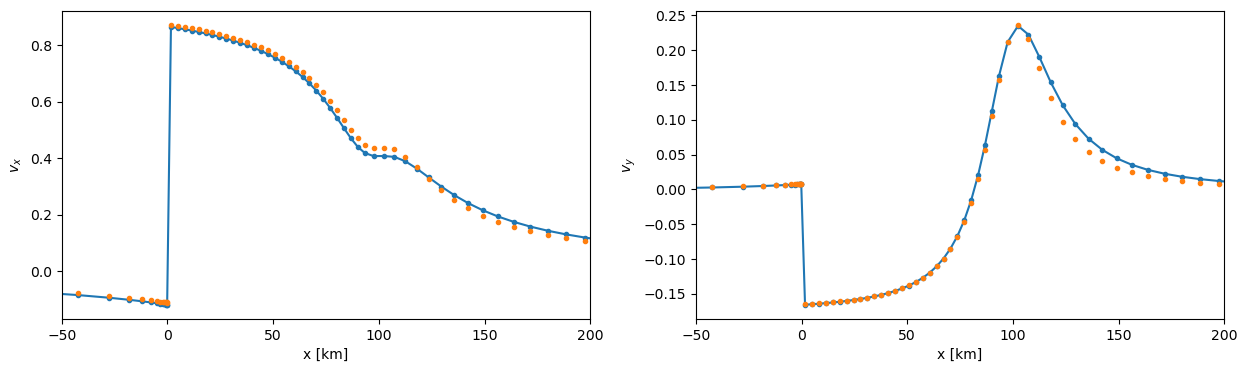

In [10]:
# Observation points
x_obs = (els.x_centers - els.x_normals * 1e-9)[labels == "topo"]
y_obs = (els.y_centers - els.y_normals * 1e-9)[labels == "topo"]
x_obs = x_obs.flatten()
y_obs = y_obs.flatten()

# Compute shear and tensile stress kernels
kernels_s = bemcs.get_displacement_stress_kernel(x_obs, y_obs, els, mu, nu, "shear")
kernels_n = bemcs.get_displacement_stress_kernel(x_obs, y_obs, els, mu, nu, "normal")

# Compute displacement and stresses (we will plot it later)
ux, uy, _, _, _ = bemcs.coeffs_to_disp_stress(kernels_s, kernels_n, qcoefs_s, qcoefs_n)

# Observation points
x_obs = (els_flat.x_centers - els_flat.x_normals * 1e-9)[labels == "topo"]
y_obs = (els_flat.y_centers - els_flat.y_normals * 1e-9)[labels == "topo"]
x_obs = x_obs.flatten()
y_obs = y_obs.flatten()

# Compute shear and tensile stress kernels
kernels_s = bemcs.get_displacement_stress_kernel(
    x_obs, y_obs, els_flat, mu, nu, "shear"
)
kernels_n = bemcs.get_displacement_stress_kernel(
    x_obs, y_obs, els_flat, mu, nu, "normal"
)

# Compute displacement and stresses (we will plot it later)
ux_flat, uy_flat, _, _, _ = bemcs.coeffs_to_disp_stress(
    kernels_s, kernels_n, qcoefs_s_flat, qcoefs_n_flat
)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(x_obs, ux, ".-")
plt.plot(x_obs, ux_flat, ".")
plt.xlabel("x [km]")
plt.ylabel("$v_x$")
plt.xlim([-50, 200])
plt.subplot(1, 2, 2)
plt.plot(x_obs, uy, ".-")
plt.plot(x_obs, uy_flat, ".")
plt.xlabel("x [km]")
plt.ylabel("$v_y$")
plt.xlim([-50, 200])
plt.show()